In [3]:
# read th information of a CSV and load into a dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the csv file
df= pd.read_csv('A1-turbine.txt',sep='	')
df.head()
#print(df.describe())

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
0,624.0,89.16,89.765,3.5,2512.85
1,628.0,93.16,93.765,3.5,2583.79
2,602.0,67.84,66.415,6.5,3748.77
3,599.0,64.84,63.415,6.5,3520.65
4,630.0,94.69,93.540,8.0,6673.84


<Axes: >

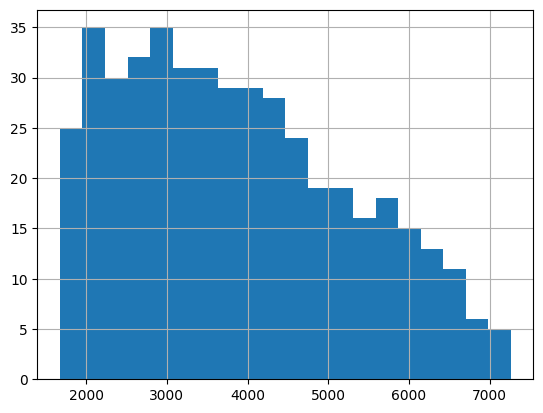

In [11]:
#plot a histogram of the 'temperatura media'
df['power_of_hydroelectrical_turbine'].hist(bins=20)

<Axes: >

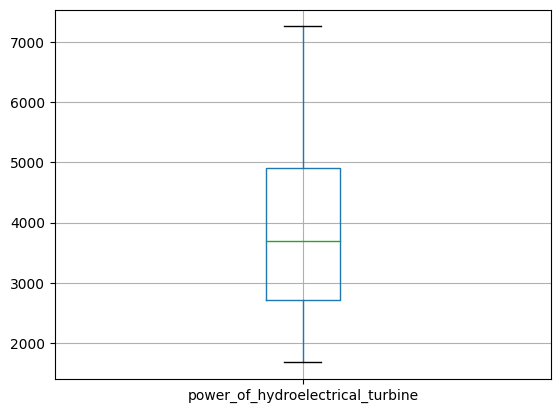

In [12]:
#plot a box whisker plot
df.boxplot(column='power_of_hydroelectrical_turbine')

In [13]:
# get the number of missing values
df.isnull().sum()
#print the number of columns and rows
print(df.shape)
#remove all the lines where all values are missing except 'provincia' and 'day'
df_all2=df.dropna(how='all',subset=['#height_over_sea_level','fall','net_fall','flow','power_of_hydroelectrical_turbine'])
#df_all2=df_all.isna(....)
#print the number of columns and rows
print(df_all2.shape)

(451, 5)
(451, 5)


In [14]:
print(df.isnull().sum())
#replace the missing values with the mean of the column for tempratura media
#df_all2['fall'].fillna(df_all2['fall'].mode(),inplace=True)
#print(df_all2.isnull().sum())

#height_over_sea_level              0
fall                                0
net_fall                            0
flow                                0
power_of_hydroelectrical_turbine    0
dtype: int64


In [15]:
#obtain all the values of the column and create a dictionary
columnName=df['fall'].unique()
#transform the list to a dictionary
dictionaryName={k:v for v,k in enumerate(columnName)}
print(dictionaryName)

df_all2['fall2']=df_all2['fall'].map(dictionaryName)

df_all2.head()

{'A Coruña': 0, 'Albacete': 1, 'Alacant/Alicante': 2, 'Almería': 3, 'Araba/Álava': 4, 'Asturias': 5, 'Ávila': 6, 'Badajoz': 7, 'Barcelona': 8, 'Bizkaia': 9, 'Burgos': 10, 'Cáceres': 11, 'Cádiz': 12, 'Cantabria': 13, 'Castelló/Castellón': 14, 'Ceuta': 15, 'Ciudad Real': 16, 'Córdoba': 17, 'Cuenca': 18, 'Gipuzkoa': 19, 'Girona': 20, 'Granada': 21, 'Guadalajara': 22, 'Huelva': 23, 'Huesca': 24, 'Illes Balears': 25, 'Jaén': 26, 'La Rioja': 27, 'Las Palmas': 28, 'León': 29, 'Lleida': 30, 'Lugo': 31, 'Madrid': 32, 'Málaga': 33, 'Melilla': 34, 'Murcia': 35, 'Navarra': 36, 'Ourense': 37, 'Palencia': 38, 'Pontevedra': 39, 'Salamanca': 40, 'Segovia': 41, 'Sevilla': 42, 'Soria': 43, 'Santa Cruz de Tenerife': 44, 'Tarragona': 45, 'Teruel': 46, 'Toledo': 47, 'València/Valencia': 48, 'Valladolid': 49, 'Zamora': 50, 'Zaragoza': 51}


,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),day,Provincia2
0,Estaca de Bares,A Coruña,13.9 (13:10),10.9 (00:20),12.4,117 (11:00),98 (13:20),2.6,0.0,0.2,2.2,1,0
1,As Pontes,A Coruña,12.3 (14:10),7.8 (00:00),10.1,NaN,NaN,0.0,0.0,0.0,0.0,1,0
2,A Coruña,A Coruña,15.3 (14:20),11.5 (00:10),13.4,69 (14:00),40 (07:50),0.6,0.0,0.2,0.2,1,0
3,A Coruña Aeropuerto,A Coruña,15.0 (14:30),9.0 (00:10),12.0,61 (07:10),32 (14:00),0.5,0.0,0.4,0.1,1,0
4,"Carballo, Depuradora",A Coruña,14.1 (23:50),11.2 (00:20),12.7,NaN,NaN,5.0,0.0,1.2,3.6,1,0


In [20]:
#Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default =(0,1)

#height_over_sea_level	fall	net	fall_flow	power_of_hydroelectrical_turbine
empty_df = pd.DataFrame()

#create a list of the features to be scaled

empty_df['#height_over_sea_level']=df['#height_over_sea_level']

empty_df['fall']= scaler.fit_transform(df[['fall']])
#empty_df['ZScoreFall']= (df['fall']-df['fall'].mean())/df['fall'].std()

empty_df['net_fall']= scaler.fit_transform(df[['net_fall']])
#empty_df['ZScoreNet']= (df['net_fall']-df['net_fall'].mean())/df['net_fall'].std()

empty_df['flow']= scaler.fit_transform(df[['flow']])
#empty_df['ZScoreFallFlow']= (df['flow']-df['flow'].mean())/df['flow'].std()

empty_df['power_of_hydroelectrical_turbine']= scaler.fit_transform(df[['power_of_hydroelectrical_turbine']])
#empty_df['ZScorePower']= (df['power_of_hydroelectrical_turbine']-df['power_of_hydroelectrical_turbine'].mean())/df['power_of_hydroelectrical_turbine'].std()

empty_df.to_csv('A1-turbine-normalized.txt', index=False, sep='	')

empty_df.head()

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
0,624.0,0.821157,0.848756,0.083333,0.149957
1,628.0,0.922628,0.946807,0.083333,0.162656
2,602.0,0.280315,0.276382,0.583333,0.371202
3,599.0,0.204211,0.202843,0.583333,0.330365
4,630.0,0.961441,0.941292,0.833333,0.894825
